** 1st Dataset of the Most Listened Songs in 2024 **

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/medazz/code/HindLAASS/student-challenges-da/curriculum/04-Supervised-Machine-Learning/06-Hyperparameters/projet_final/data_projet_final/Most Streamed Spotify Songs 2024.csv'
data = pd.read_csv(file_path, encoding='latin1')

data.head()


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

Dataset cleaning 

In [ ]:
# number of lines and colums 
dataset_size = data.shape

# number of missing values 
missing_values = data.isnull().sum().sum()Ò

# number of duplicates 
duplicate_rows = data.duplicated().sum()

# Number of NaN values per column 
missing_values_per_column = data.isnull().sum()

# Affichage détaillé du nombre de valeurs NaN par colonne sous forme de DataFrame
missing_values_df = missing_values_per_column.reset_index()
missing_values_df.columns = ["Column", "Missing Values"]

print("Shape of my dataset :", dataset_size)
print("Number of missing values :", missing_values)
print("Number of dupicated rows :" ,duplicate_rows)
print(missing_values_df.columns)

# Removal of the empty column TIDAL Popularity
data.drop(columns=["TIDAL Popularity"],inplace=True, errors='ignore') 
# Replacement of missing artist values 
data["Artist"].fillna("Unknown", inplace=True) 
# All columns containing numbers with commas (removal of commas and conversion to int)
cols_to_convert = [
    "Spotify Streams", "Spotify Playlist Count", "Spotify Playlist Reach", "YouTube Views",
    "YouTube Likes", "TikTok Posts", "TikTok Likes", "TikTok Views", "YouTube Playlist Reach",
    "AirPlay Spins", "SiriusXM Spins", "Deezer Playlist Reach", "Pandora Streams",
    "Pandora Track Stations", "Soundcloud Streams", "Shazam Counts"] 

for col in cols_to_convert:
    data[col] = data[col].astype(str).str.replace(",", "").replace("nan", "0").astype(float)
    
data.fillna(0, inplace=True) # Replacement of remaining NaN values with 0 for numeric columns

# Saving the cleaned dataset
cleaned_file_path = "/Users/medazz/code/HindLAASS/student-challenges-da/curriculum/04-Supervised-Machine-Learning/06-Hyperparameters/projet_final/data_projet_final/cleaned_Spotify_Songs_2024.csv"
data.to_csv(cleaned_file_path, index=False)
data.columns





Shape of my dataset : (4600, 28)
Number of missing values : 0
Number of dupicated rows : 2


ModuleNotFoundError: No module named 'tabulate'

**Top 10 des Artistes les plus Populaires (2024)**

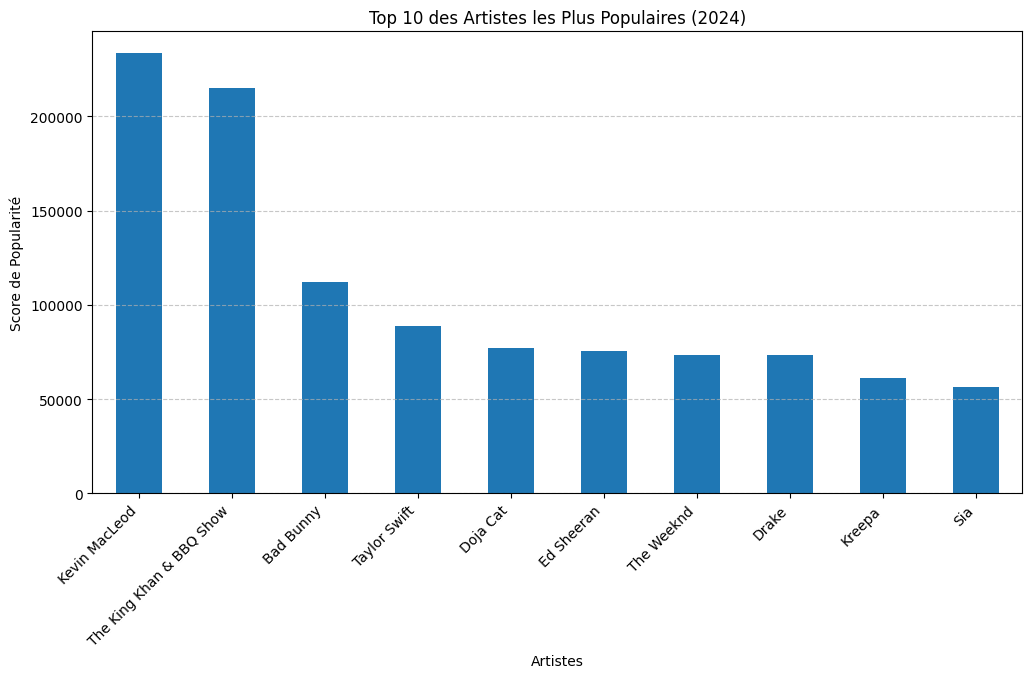

In [ ]:

file_path = '/Users/medazz/code/HindLAASS/student-challenges-da/curriculum/04-Supervised-Machine-Learning/06-Hyperparameters/projet_final/data_projet_final/cleaned_Spotify_Songs_2024.csv'
data_cleaned = pd.read_csv(file_path, encoding='latin1')

# Calculation of popularity score by combining multiple sources (normalisation of scores to be able to do addition)
data_cleaned["Popularity Score"] = (
    data_cleaned["Spotify Popularity"].fillna(0) + data_cleaned["Spotify Streams"].fillna(0) / 1e6 + data_cleaned["YouTube Views"].fillna(0) / 1e6 +
    data_cleaned["TikTok Views"].fillna(0) / 1e6 + data_cleaned["Shazam Counts"].fillna(0) / 1e5   
)

# Ranking of artists by Popularity Score
top_artists = data_cleaned.groupby("Artist")["Popularity Score"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar')
plt.xlabel("Artistes")
plt.ylabel("Score de Popularité")
plt.title("Top 10 des Artistes les plus Populaires (2024)")
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Top 10 des Chansons les Plus Populaires**

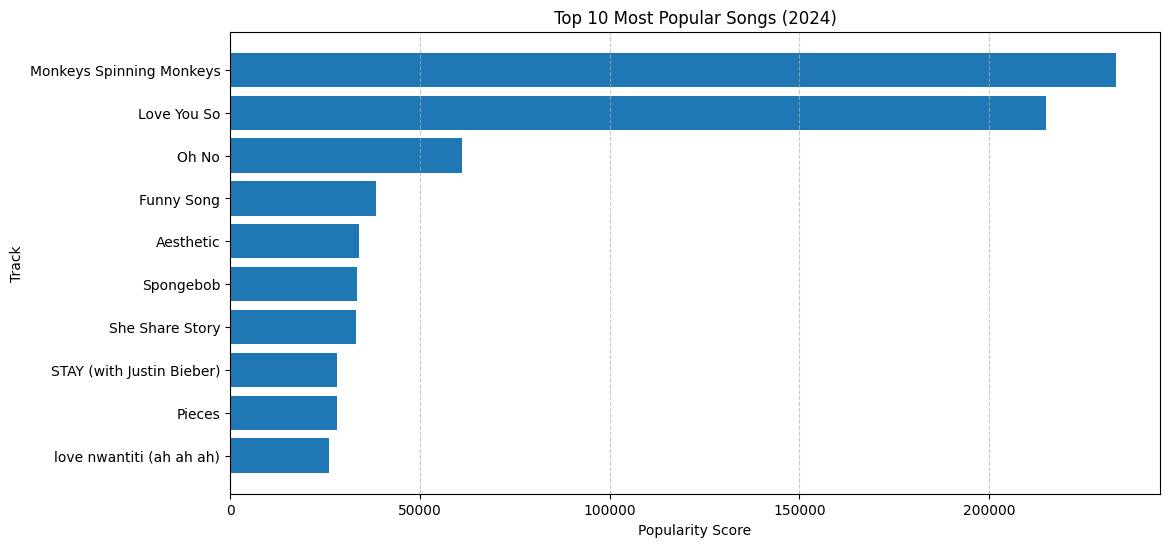

In [ ]:
top_tracks = data_cleaned.sort_values(by="Popularity Score", ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_tracks["Track"], top_tracks["Popularity Score"])
plt.xlabel("Popularity Score")
plt.ylabel("Track")
plt.title("Top 10 Most Popular Songs (2024)")
plt.gca().invert_yaxis() 
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


**Top 10 des Chansons les Plus Virales sur TikTok**

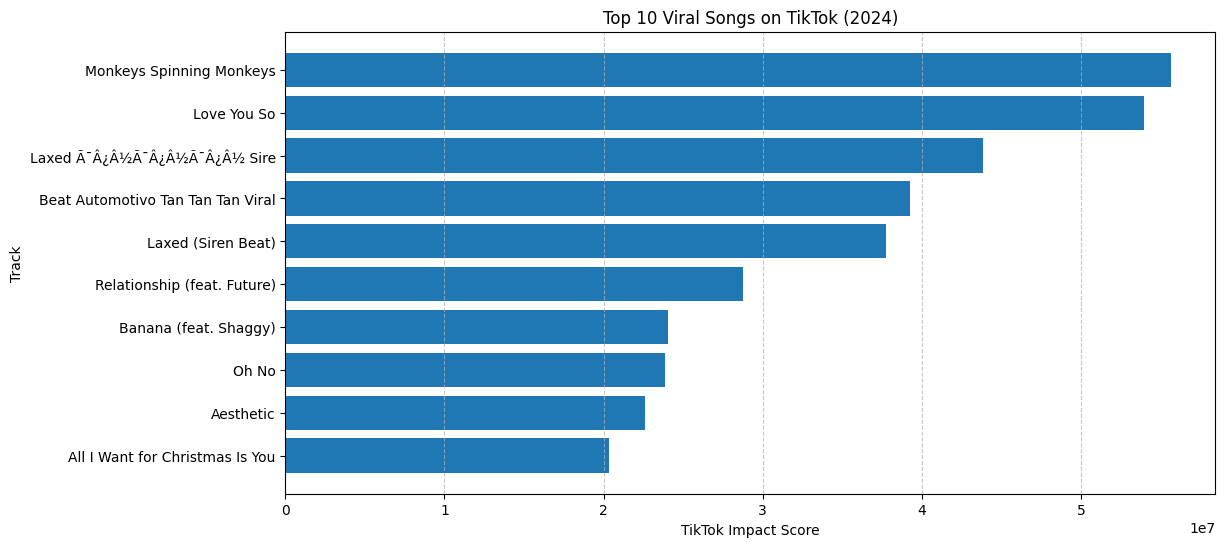

In [41]:

# Calculate TikTok Impact Score
data_cleaned["TikTok Impact"] = (
    data_cleaned["TikTok Posts"].fillna(0) +
    data_cleaned["TikTok Likes"].fillna(0) / 1000 +
    data_cleaned["TikTok Views"].fillna(0) / 1e6
)

# Rank the songs by TikTok Impact Score
top_tiktok_tracks = data_cleaned.sort_values(by="TikTok Impact", ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_tiktok_tracks["Track"], top_tiktok_tracks["TikTok Impact"])
plt.xlabel("TikTok Impact Score")
plt.ylabel("Track")
plt.title("Top 10 Viral Songs on TikTok (2024)")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


**Top 10 des Chansons les Plus Populaires sur YouTube**

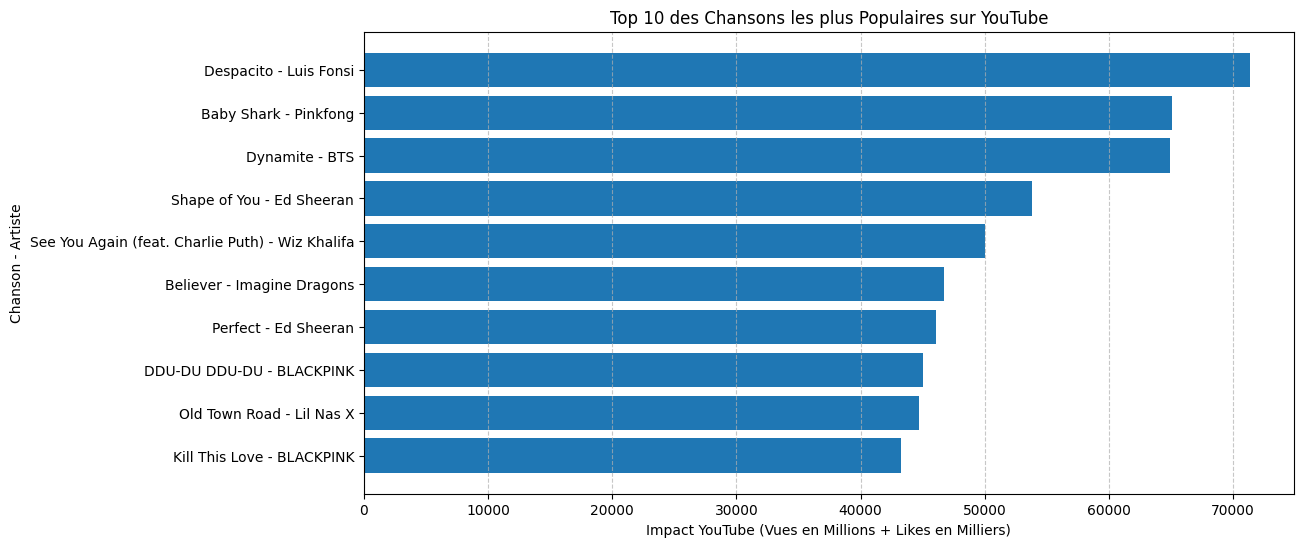

In [45]:
required_columns = ["Track", "Artist", "YouTube Views", "YouTube Likes"]
missing_columns = [col for col in required_columns if col not in data_cleaned.columns]

if missing_columns:
    raise ValueError(f"Les colonnes suivantes sont manquantes dans df_cleaned: {missing_columns}")

data_cleaned["YouTube Impact"] = (
    data_cleaned["YouTube Views"].fillna(0) / 1e6 +  
    data_cleaned["YouTube Likes"].fillna(0) / 1000 )

top_youtube_tracks = data_cleaned[["Track", "Artist", "YouTube Impact"]].sort_values(by="YouTube Impact", ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_youtube_tracks["Track"] + " - " + top_youtube_tracks["Artist"], top_youtube_tracks["YouTube Impact"])
plt.xlabel("Impact YouTube (Vues en Millions + Likes en Milliers)")
plt.ylabel("Chanson - Artiste")
plt.title("Top 10 des Chansons les plus Populaires sur YouTube")
plt.gca().invert_yaxis()  
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


**Tendances Des Chansons Populaires Par Année**

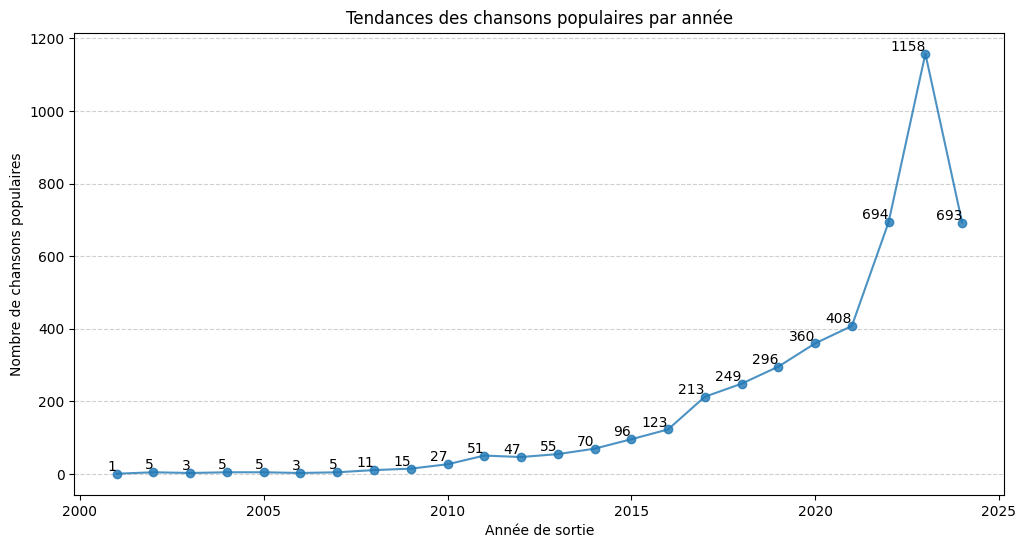

In [65]:
top_tracks = data_cleaned.sort_values(by="Popularity Score", ascending=False).head(10)


data_cleaned["Release Date"] = pd.to_datetime(data_cleaned["Release Date"], errors='coerce')
data_cleaned = data_cleaned.dropna(subset=["Release Date"])  # Supprimer les lignes sans date

data_cleaned["Release Year"] = data_cleaned["Release Date"].dt.year

# Supprimer les valeurs aberrantes (ex: 1900 qui n'est pas une vraie année de sortie)
df_cleaned = data_cleaned[data_cleaned["Release Year"] >2000]

# Compter le nombre de chansons par année en affichant uniquement les dates disponibles
tracks_per_year = df_cleaned["Release Year"].value_counts().sort_index()

# Affichage du graphique des tendances musicales par année après suppression des valeurs aberrantes
plt.figure(figsize=(12, 6))
tracks_per_year.plot(kind='line', marker='o',  alpha=0.8)
for year, value in zip(tracks_per_year.index, tracks_per_year.values):
    plt.text(year, value, str(value), fontsize=10, ha='right', va='bottom')
plt.title("Tendances des chansons populaires par année")
plt.xlabel("Année de sortie")
plt.ylabel("Nombre de chansons populaires")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [ ]:
df_cleaned["Release Year"]

0       2024
1       2024
2       2024
3       2023
4       2024
        ... 
4595    2017
4596    2018
4597    2020
4598    2016
4599    2017
Name: Release Year, Length: 4513, dtype: int64